# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [36]:
# Checking the number of mice.
mice = combined_data['Mouse ID'].value_counts()
total_mice = len(mice)
total_mice

249

In [37]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']), 
                                   'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [38]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = combined_data[combined_data.duplicated(['Mouse ID'])]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [39]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.drop_duplicates('Mouse ID')
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [40]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df['Mouse ID'].value_counts()
total_clean_mice = len(clean_mice)
total_clean_mice

249

## Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_data = combined_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median_data = combined_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance_data = combined_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standard_dev_data = combined_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem_data = combined_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_df = pd.DataFrame({'Mean Tumor Volume': mean_data,
                           'Median Tumor Volume': median_data,
                           'Tumor Volume Variance': variance_data,
                          'Tumor Volume Std. Dev.': standard_dev_data,
                          'Tumor Volume Std. Err.': sem_data})
summary_df
summary_df.to_csv('fileOne.csv', index=False, header=True)

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
stats_table = combined_data.groupby('Drug Regimen')
summary_stats_table = stats_table.agg(['mean','median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
summary_stats_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

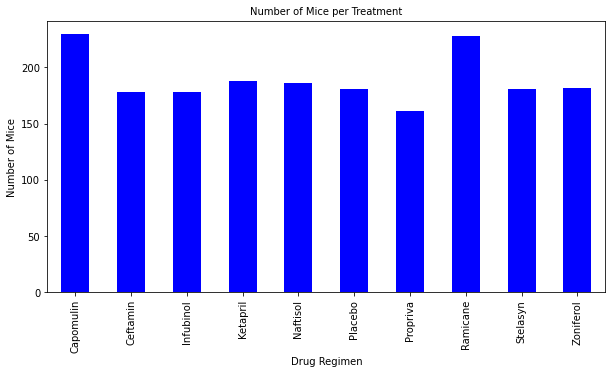

In [43]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_data = combined_data.groupby(['Drug Regimen']).count()['Mouse ID']

bar_plot = drug_data.plot.bar(figsize=(10,5), color='b', fontsize=10)
#drug_data
plt.xlabel('Drug Regimen', fontsize=10)
plt.ylabel('Number of Mice', fontsize=10)
plt.title('Number of Mice per Treatment', fontsize=10)
plt.show()

In [44]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.
drug_reg = summary_df.index.tolist()
drug_reg

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [45]:
total_drug = (combined_data.groupby(['Drug Regimen'])['Mouse ID'].count()).tolist()
total_drug

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

Text(0, 0.5, 'Count')

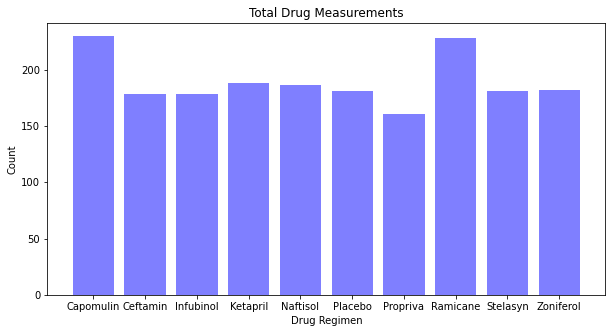

In [47]:
x_axis = np.arange(len(total_drug))

x_axis = drug_reg
plt.figure(figsize=(10,5))
plt.bar(x_axis, total_drug, color='b', alpha=0.5, align='center')

plt.title('Total Drug Measurements')
plt.xlabel('Drug Regimen')
plt.ylabel('Count')

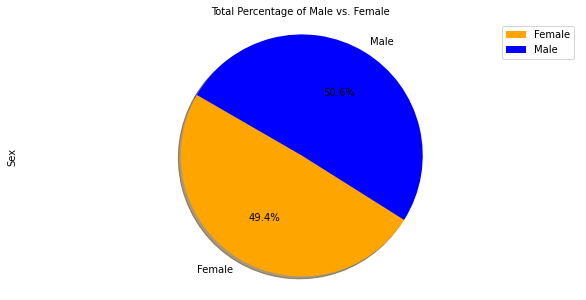

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group_df = pd.DataFrame(combined_data.groupby(['Sex']).count()).reset_index()
#gender_group_df.head()

gender_group_df = gender_group_df[['Mouse ID', 'Sex']]
gender_group_df.head()

labels = ['Female', 'Male']
colors = ['orange', 'blue']
plot = gender_group_df.plot.pie(y='Mouse ID',figsize=(10,5), colors = colors, labels=labels, startangle=150, shadow = True, autopct="%1.1f%%")

plt.title('Total Percentage of Male vs. Female',fontsize = 10)
plt.xlabel('')
plt.ylabel('Sex', fontsize = 10)
plt.axis('equal')

plt.show()

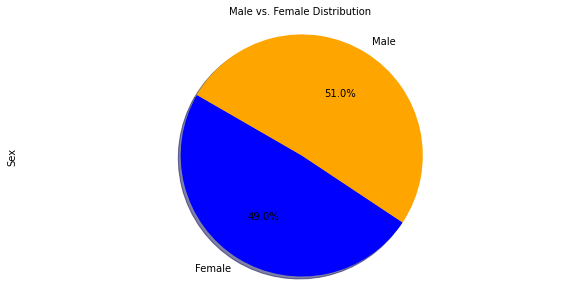

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
size = [49.0, 51.0]
colors = ['blue', 'orange']

fig1, ax1 = plt.subplots(figsize=(10,5))
plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=150)
plt.title('Male vs. Female Distribution', fontsize=10)
plt.ylabel('Sex', fontsize=10)
plt.axis('equal')

plt.show()

## Quartiles, Outliers and Boxplots

In [69]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
combined_data.head()

# Start by getting the last (greatest) timepoint for each mouse
capomulin_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]
ramicane_df = combined_data.loc[combined_data["Drug Regimen"] == "Ramicane", :]
infubinol_df = combined_data.loc[combined_data["Drug Regimen"] == "Infubinol", :]
ceftamin_df = combined_data.loc[combined_data["Drug Regimen"] == "Ceftamin", :]

cap_last_tp = capomulin_df.groupby('Mouse ID').max()['Timepoint']
cap_volume = pd.DataFrame(cap_last_tp)
merged_cap = pd.merge(cap_volume, combined_data, on=('Mouse ID', 'Timepoint'), how='left')
merged_cap.head()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [73]:
cap_tumors = merged_cap["Tumor Volume (mm3)"]

quartiles =cap_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Capomulin's potential outliers: below {lower_bound} and above {upper_bound}")

Capomulin's potential outliers: below 20.70456164999999 and above 51.83201549


In [70]:
ram_last_tp = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ram_volume = pd.DataFrame(ram_last_tp)
merged_ram = pd.merge(ram_volume, combined_data, on=('Mouse ID', 'Timepoint'), how='left')
merged_ram.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [75]:
ram_tumors = merged_ram["Tumor Volume (mm3)"]

quartiles =ram_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Ramicane's potential outliers: below {lower_bound} and above {upper_bound}")

Ramicane's potential outliers: below 17.912664470000003 and above 54.30681135


In [71]:
inf_last_tp = infubinol_df.groupby('Mouse ID').max()['Timepoint']
inf_volume = pd.DataFrame(inf_last_tp)
merged_inf = pd.merge(inf_volume, combined_data, on=('Mouse ID', 'Timepoint'), how='left')
merged_inf.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [76]:
inf_tumors = merged_inf["Tumor Volume (mm3)"]

quartiles =cap_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Infubinol's potential outliers: below {lower_bound} and above {upper_bound}")

Infubinol's potential outliers: below 20.70456164999999 and above 51.83201549


In [72]:
ceft_last_tp = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceft_volume = pd.DataFrame(ceft_last_tp)
merged_ceft = pd.merge(ceft_volume, combined_data, on=('Mouse ID', 'Timepoint'), how='left')
merged_ceft.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [77]:
ceft_tumors = merged_ceft["Tumor Volume (mm3)"]

quartiles =ceft_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Ceftamin's potential outliers: below {lower_bound} and above {upper_bound}")

Ceftamin's potential outliers: below 25.355449580000002 and above 87.66645829999999


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


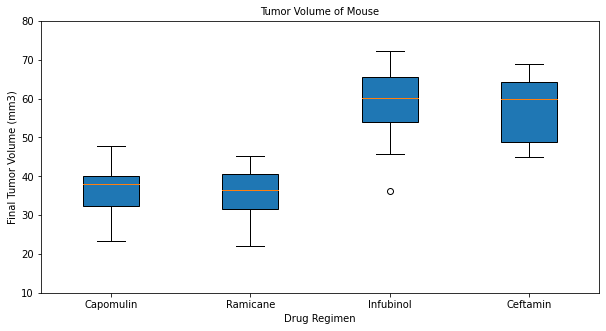

In [78]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot = [cap_tumors, ram_tumors, inf_tumors, ceft_tumors]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(10, 5))
ax1.set_title('Tumor Volume of Mouse',fontsize=10)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize=10)
ax1.set_xlabel('Drug Regimen',fontsize=10)
ax1.boxplot(box_plot, labels=Regimen, widths = 0.4, patch_artist=True, vert=True)

plt.ylim(10, 80)

plt.show()

## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

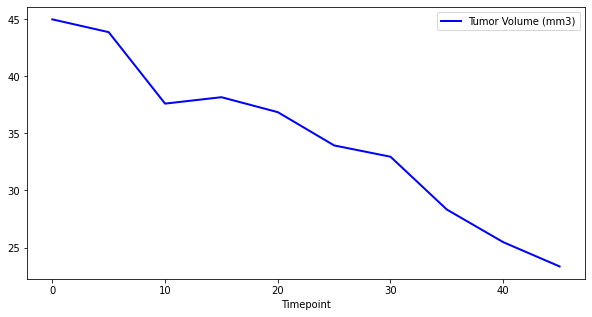

In [81]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot_df = capomulin_df.loc[combined_data['Drug Regimen'] == 'Capomulin']
line_plot_df.head()

capomulin_subject = line_plot_df.loc[line_plot_df['Mouse ID'] == 's185']
capomulin_subject

capomulin_subject = capomulin_subject.loc[:, ['Timepoint', 'Tumor Volume (mm3)']]

capomulin_subject = capomulin_subject.reset_index(drop=True)
capomulin_subject.set_index('Timepoint').plot(figsize=(10,5), linewidth=2, color='blue')

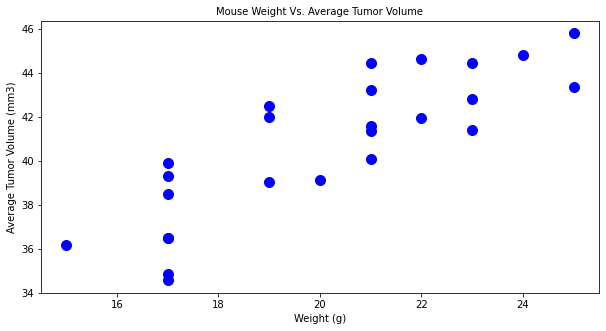

In [92]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(10, 5))
avg_tumor_vol = capomulin_df.groupby(['Mouse ID']).mean()

marker_size=10
plt.scatter(avg_tumor_vol['Weight (g)'],avg_tumor_vol['Tumor Volume (mm3)'], s=100, color="blue")
plt.title('Mouse Weight Vs. Average Tumor Volume', fontsize =10)
plt.xlabel('Weight (g)', fontsize =10)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=10)

plt.show()

## Correlation and Regression

In [94]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(avg_tumor_vol['Weight (g)'],avg_tumor_vol['Tumor Volume (mm3)'])[0],2)
print(f'The correlation coefficient comparing weight to tumor volume is {correlation}')

The correlation coefficient comparing weight to tumor volume is 0.84


In [97]:
from scipy.stats import linregress

x_values = avg_tumor_vol['Weight (g)']
y_values = avg_tumor_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

y = 0.95x + 21.55


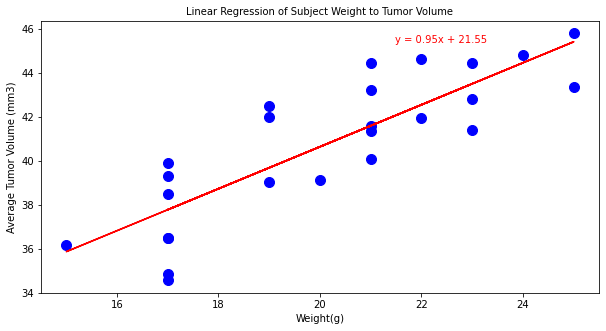

In [99]:
fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.scatter(x_values, y_values, s=100, color="blue")
plt.plot(x_values, regress_values, "r-")
plt.title('Linear Regression of Subject Weight to Tumor Volume', fontsize=10)
plt.xlabel('Weight(g)',fontsize =10)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=10)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), 
             textcoords='axes fraction', 
             horizontalalignment='right', 
             verticalalignment='top',fontsize=10, color="red")

plt.show()